# 导入数据 预处理

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
mp.matplotlib_fname()
from scipy.stats import spearmanr, kendalltau
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
pd.set_option('display.notebook_repr_html', False)
data = pd.read_excel(io='../data/附件2.xlsx', sheet_name='Sheet1')

In [3]:
data

             销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型  \
0      2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售   
1      2020-07-01  09:17:27.295  102900005115960   0.849         3.2   销售   
2      2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售   
3      2020-07-01  09:19:45.450  102900005115823   0.421        10.0   销售   
4      2020-07-01  09:20:23.686  102900005115908   0.539         8.0   销售   
...           ...           ...              ...     ...         ...  ...   
878498 2023-06-30  21:35:13.264  102900005115250   0.284        24.0   销售   
878499 2023-06-30  21:35:14.358  102900011022764   0.669        12.0   销售   
878500 2023-06-30  21:35:20.264  102900005115250   0.125        24.0   销售   
878501 2023-06-30  21:35:21.509  102900011016701   0.252         5.2   销售   
878502 2023-06-30  21:40:48.248  102900011022764   0.803        12.0   销售   

       是否打折销售  
0           否  
1           否  
2           否  
3          

## 创建单品编码与单品名称 单品名称与其分类哈希表

In [4]:
excel1 = pd.read_excel(io='../data/附件1.xlsx', sheet_name='Sheet1')
excel1

                单品编码        单品名称        分类编码 分类名称
0    102900005115168        牛首生菜  1011010101  花叶类
1    102900005115199       四川红香椿  1011010101  花叶类
2    102900005115625      本地小毛白菜  1011010101  花叶类
3    102900005115748         白菜苔  1011010101  花叶类
4    102900005115762          苋菜  1011010101  花叶类
..               ...         ...         ...  ...
246  106958851400125   海鲜菇(袋)(4)  1011010801  食用菌
247  106971533450003      海鲜菇(包)  1011010801  食用菌
248  106971533455008   海鲜菇(袋)(3)  1011010801  食用菌
249  106973223300667   虫草花(盒)(2)  1011010801  食用菌
250  106973990980123  和丰阳光海鲜菇(包)  1011010801  食用菌

[251 rows x 4 columns]

In [5]:
def df2List(tabel):
    df = excel1[[tabel]]
    _array = np.array(df.stack())
    _list = _array.tolist()
    return _list

In [6]:
# 单品编码列表
code_list = df2List('单品编码')
# 单品名称列表
name_list = df2List('单品名称')
# 分类编码列表
class_code_list = df2List('分类编码')
# 分类名称列表
class_name_list = df2List('分类名称')

In [7]:
# 单品编码2单品名称哈希表
code2name = {}
for i in range(len(code_list)):
    code2name[code_list[i]] = name_list[i]
code2name

{102900005115168: '牛首生菜',
 102900005115199: '四川红香椿',
 102900005115625: '本地小毛白菜',
 102900005115748: '白菜苔',
 102900005115762: '苋菜',
 102900005115779: '云南生菜',
 102900005115786: '竹叶菜',
 102900005115793: '小白菜',
 102900005115816: '南瓜尖',
 102900005115823: '上海青',
 102900005115854: '萝卜叶',
 102900005115861: '牛首油菜',
 102900005115878: '茼蒿',
 102900005115885: '蔡甸藜蒿',
 102900005115908: '菜心',
 102900005115946: '木耳菜',
 102900005115960: '大白菜',
 102900005115977: '豌豆尖',
 102900005115984: '云南油麦菜',
 102900005116639: '马齿苋',
 102900005116776: '本地菠菜',
 102900005116790: '黄心菜(1)',
 102900005116806: '黑油菜',
 102900005118572: '本地上海青',
 102900005118817: '菠菜',
 102900005118831: '娃娃菜',
 102900005119975: '红薯尖',
 102900005122654: '枝江红菜苔',
 102900005128748: '黄花菜',
 102900011000175: '快菜',
 102900011000571: '随州泡泡青',
 102900011002414: '田七',
 102900011006689: '东门口小白菜',
 102900011006948: '外地茼蒿',
 102900011006955: '冰草',
 102900011007464: '紫苏',
 102900011007471: '薄荷叶',
 102900011007495: '蒲公英',
 102900011008133: '丝瓜尖',
 1029000

In [8]:
# 单品名称2分类名称哈希表
name2class = {}
for i in range(len(name_list)):
    name2class[name_list[i]] = class_name_list[i]
name2class

{'牛首生菜': '花叶类',
 '四川红香椿': '花叶类',
 '本地小毛白菜': '花叶类',
 '白菜苔': '花叶类',
 '苋菜': '花叶类',
 '云南生菜': '花叶类',
 '竹叶菜': '花叶类',
 '小白菜': '花叶类',
 '南瓜尖': '花叶类',
 '上海青': '花叶类',
 '萝卜叶': '花叶类',
 '牛首油菜': '花叶类',
 '茼蒿': '花叶类',
 '蔡甸藜蒿': '花叶类',
 '菜心': '花叶类',
 '木耳菜': '花叶类',
 '大白菜': '花叶类',
 '豌豆尖': '花叶类',
 '云南油麦菜': '花叶类',
 '马齿苋': '花叶类',
 '本地菠菜': '花叶类',
 '黄心菜(1)': '花叶类',
 '黑油菜': '花叶类',
 '本地上海青': '花叶类',
 '菠菜': '花叶类',
 '娃娃菜': '花叶类',
 '红薯尖': '花叶类',
 '枝江红菜苔': '花叶类',
 '黄花菜': '花叶类',
 '快菜': '花叶类',
 '随州泡泡青': '花叶类',
 '田七': '花叶类',
 '东门口小白菜': '花叶类',
 '外地茼蒿': '花叶类',
 '冰草': '花叶类',
 '紫苏': '花叶类',
 '薄荷叶': '花叶类',
 '蒲公英': '花叶类',
 '丝瓜尖': '花叶类',
 '奶白菜': '花叶类',
 '芥菜': '花叶类',
 '大芥兰': '花叶类',
 '面条菜': '花叶类',
 '甜白菜': '花叶类',
 '荠菜': '花叶类',
 '马兰头': '花叶类',
 '甘蓝叶': '花叶类',
 '洪山菜苔': '花叶类',
 '本地黄心油菜': '花叶类',
 '青菜苔': '花叶类',
 '小青菜(1)': '花叶类',
 '鲜粽子叶': '花叶类',
 '艾蒿': '花叶类',
 '奶白菜苗': '花叶类',
 '菊花油菜': '花叶类',
 '双沟白菜': '花叶类',
 '枝江红菜苔(份)': '花叶类',
 '云南生菜(份)': '花叶类',
 '云南油麦菜(份)': '花叶类',
 '茼蒿(份)': '花叶类',
 '菠菜(份)': '花叶类',
 '菜心(份)': '花叶类',
 '上海青(份)': '花叶类',
 '小青菜(2

In [9]:
sell_amount = data[['销售日期', '单品编码', '销量(千克)']]
sell_amount.loc[:,'销售日期'] = pd.to_datetime(sell_amount.loc[:,'销售日期'])
for i in range(len(sell_amount)):
    sell_amount.loc[i,'单品编码'] = code2name[sell_amount.loc[i,'单品编码']]
sell_amount

C:\Users\Chou\AppData\Local\Temp\ipykernel_16308\4198921976.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '泡泡椒(精品)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sell_amount.loc[i,'单品编码'] = code2name[sell_amount.loc[i,'单品编码']]


             销售日期     单品编码  销量(千克)
0      2020-07-01  泡泡椒(精品)   0.396
1      2020-07-01      大白菜   0.849
2      2020-07-01  泡泡椒(精品)   0.409
3      2020-07-01      上海青   0.421
4      2020-07-01       菜心   0.539
...           ...      ...     ...
878498 2023-06-30  西峡花菇(1)   0.284
878499 2023-06-30      长线茄   0.669
878500 2023-06-30  西峡花菇(1)   0.125
878501 2023-06-30  芜湖青椒(1)   0.252
878502 2023-06-30      长线茄   0.803

[878503 rows x 3 columns]

不同单品总销量

In [10]:
sell_amount_total = sell_amount.groupby('单品编码')['销量(千克)'].sum()
sell_amount_total

单品编码
七彩椒(1)       263.192
七彩椒(2)       370.033
七彩椒(份)        18.000
上海青         7606.756
上海青(份)      3070.000
              ...   
黑牛肝菌           1.084
黑牛肝菌(盒)        4.000
黑皮鸡枞菌          5.795
黑皮鸡枞菌(盒)       4.000
龙牙菜          186.831
Name: 销量(千克), Length: 246, dtype: float64

In [11]:
# sell_amount_total.plot.bar(color='blue', title='不同单品蔬菜销售总量')
# plt.xlabel('单品')
# plt.ylabel('销售量（千克）')
# plt.show()

In [12]:
sell_monthly = sell_amount.groupby(['单品编码', sell_amount['销售日期'].dt.year, sell_amount['销售日期'].dt.month])['销量(千克)'].sum()
monthly_sell = sell_amount.groupby([sell_amount['销售日期'].dt.year, sell_amount['销售日期'].dt.month, '单品编码'])['销量(千克)'].sum()

不同单品月销售量

In [13]:
sell_monthly

单品编码    销售日期  销售日期
七彩椒(1)  2020  7       32.928
              8       14.843
              9       14.841
              10      14.177
              11      13.523
                       ...  
龙牙菜     2022  10      61.828
              11      43.613
              12      53.135
        2023  1       22.297
              2        5.958
Name: 销量(千克), Length: 2514, dtype: float64

## 每月不同单品销售量

In [14]:
sell_class_amount = sell_amount.copy(deep=True)
for i in range(len(sell_class_amount)):
    sell_class_amount.loc[i,'单品编码'] = name2class[sell_amount.loc[i,'单品编码']]
sell_class_amount

             销售日期 单品编码  销量(千克)
0      2020-07-01  辣椒类   0.396
1      2020-07-01  花叶类   0.849
2      2020-07-01  辣椒类   0.409
3      2020-07-01  花叶类   0.421
4      2020-07-01  花叶类   0.539
...           ...  ...     ...
878498 2023-06-30  食用菌   0.284
878499 2023-06-30   茄类   0.669
878500 2023-06-30  食用菌   0.125
878501 2023-06-30  辣椒类   0.252
878502 2023-06-30   茄类   0.803

[878503 rows x 3 columns]

## 不同品类总销量

In [15]:
sell_class_total = sell_class_amount.groupby('单品编码')['销量(千克)'].sum()
sell_class_total

单品编码
水生根茎类     40581.353
花叶类      198520.978
花菜类       41766.451
茄类        22431.782
辣椒类       91588.629
食用菌       76086.725
Name: 销量(千克), dtype: float64

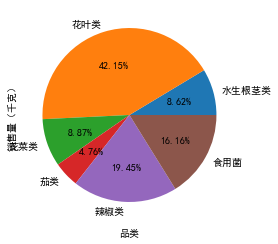

In [16]:
sell_class_total.plot.pie(autopct='%.2f%%')
plt.xlabel('品类')
plt.ylabel('销售量（千克）')
plt.show()

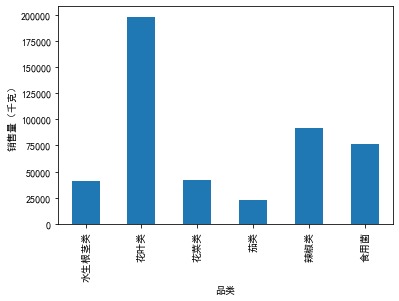

In [17]:
sell_class_total.plot.bar()
plt.xlabel('品类')
plt.ylabel('销售量（千克）')
plt.show()

## 不同品类月销量

In [18]:
sell_class_amount_monthly = sell_class_amount.groupby(['单品编码', sell_amount['销售日期'].dt.year, sell_amount['销售日期'].dt.month])['销量(千克)'].sum()
sell_monthly_class_amount = sell_class_amount.groupby([sell_amount['销售日期'].dt.year, sell_amount['销售日期'].dt.month, '单品编码'])['销量(千克)'].sum()

In [19]:
sell_class_amount_monthly

单品编码   销售日期  销售日期
水生根茎类  2020  7        332.056
             8        867.180
             9        798.931
             10      1344.118
             11       960.695
                       ...   
食用菌    2023  2       2607.748
             3       2696.437
             4       2481.835
             5       2128.108
             6       1718.985
Name: 销量(千克), Length: 216, dtype: float64

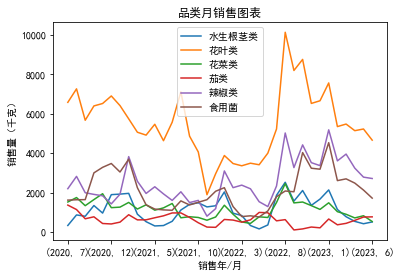

In [20]:
# 品类月销售图表
for i in sell_class_total.index:
    sell_class_amount_monthly[i].plot(label=i)
plt.title("品类月销售图表")
plt.xlabel('销售年/月')
plt.ylabel('销售量（千克）')
plt.legend(loc='best')
plt.show()

# 相关性分析

## 品类

In [21]:
aq_rhi = [] # 水生根茎类
flo_leaves = [] # 花叶类
flo_veg = [] # 花菜类
solanula = [] # 茄类
peppers = [] # 辣椒类
fungi = [] # 食用菌

j = 1
for i in sell_class_amount_monthly:
    if j <= 36:
        aq_rhi.append(i)
    elif j <= 72:
        flo_leaves.append(i)
    elif j <= 108:
        flo_veg.append(i)
    elif j <= 144:
        solanula.append(i)
    elif j <= 180:
        peppers.append(i)
    else:
        fungi.append(i)
    j+=1

归一化处理

In [22]:
scaler = StandardScaler()
aq_rhi_n = scaler.fit_transform(np.array(aq_rhi).reshape(-1, 1)).tolist()
flo_leaves_n = scaler.fit_transform(np.array(flo_leaves).reshape(-1, 1)).tolist()
flo_veg_n = scaler.fit_transform(np.array(flo_veg).reshape(-1, 1)).tolist()
solanula_n = scaler.fit_transform(np.array(solanula).reshape(-1, 1)).tolist()
peppers_n = scaler.fit_transform(np.array(peppers).reshape(-1, 1)).tolist()
fungi_n = scaler.fit_transform(np.array(fungi).reshape(-1, 1)).tolist()

In [23]:
sell = [aq_rhi_n, flo_leaves_n, flo_veg_n, solanula_n, peppers_n, fungi_n]
sell_name = ["水生根茎类", "花叶类", "花菜类", "茄类", "辣椒类", "食用菌"]

In [24]:
relate_class = np.zeros([6,6])

使用Spearmanr秩相关系数

In [25]:
for i in range(6):
    for j in range(6):
        relate_class[i, j], p = spearmanr(sell[i], sell[j])
relate_class

array([[ 1.        ,  0.44787645,  0.42676963, -0.46666667,  0.31634492,
         0.66924067],
       [ 0.44787645,  1.        ,  0.69472329, -0.04324324,  0.48777349,
         0.57812098],
       [ 0.42676963,  0.69472329,  1.        ,  0.07619048,  0.31016731,
         0.46229086],
       [-0.46666667, -0.04324324,  0.07619048,  1.        , -0.16962677,
        -0.44684685],
       [ 0.31634492,  0.48777349,  0.31016731, -0.16962677,  1.        ,
         0.49034749],
       [ 0.66924067,  0.57812098,  0.46229086, -0.44684685,  0.49034749,
         1.        ]])

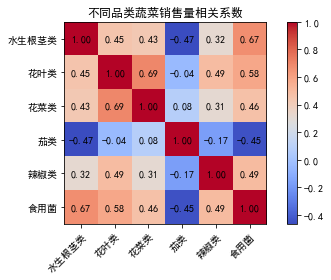

In [26]:
plt.xticks(np.arange(len(sell)), labels=sell_name, 
                     rotation=45, rotation_mode="anchor", ha="right")
plt.yticks(np.arange(len(sell)), labels=sell_name)
plt.title("不同品类蔬菜销售量相关系数")
for i in range(len(sell)):
    for j in range(len(sell)):
        text = plt.text(j, i, '%.2f'%relate_class[i, j], ha="center", va="center")
plt.imshow(relate_class, cmap='coolwarm', origin='upper')
plt.tight_layout()
plt.colorbar()
plt.show()

## 同品类间的相关性(按月分布)

In [27]:
sell_amount_total = sell_amount.groupby('单品编码')['销量(千克)'].sum().to_frame()
sell_amount_total_sort = sell_amount_total.sort_values(by="销量(千克)",ascending=False)
sell_amount_total_top = sell_amount_total_sort.index.tolist()[0:int(len(sell_amount_total_sort.index) * 0.1)]
sell_monthly_df = sell_monthly.unstack(0).fillna(0)
sell_monthly_df

单品编码       七彩椒(1)  七彩椒(2)  七彩椒(份)      上海青  上海青(份)   东门口小白菜    丝瓜尖    云南油麦菜  \
销售日期 销售日期                                                                     
2020 7     32.928   0.000     0.0  452.999     0.0   55.090  0.000  935.567   
     8     14.843   0.000     0.0  702.708     0.0   50.767  0.000  745.185   
     9     14.841   0.000     0.0  529.028     0.0   47.205  0.000  319.056   
     10    14.177   0.000     0.0  256.740     0.0   52.200  0.000  337.648   
     11    13.523   0.000     0.0  152.065     0.0   24.107  0.000  330.112   
     12    29.177   0.000     0.0  152.823     0.0   31.250  0.000  420.726   
2021 1     29.480   0.000     0.0  255.919     0.0   62.923  0.000  473.764   
     2     11.448   0.000     0.0  408.955     0.0   44.480  4.231  752.867   
     3      1.533   0.000     0.0  393.509     0.0   55.459  0.000  706.430   
     4      0.490   0.000     0.0  403.399     0.0  120.176  0.000  333.600   
     5      1.449   0.000     0.0  236.796     0.0  

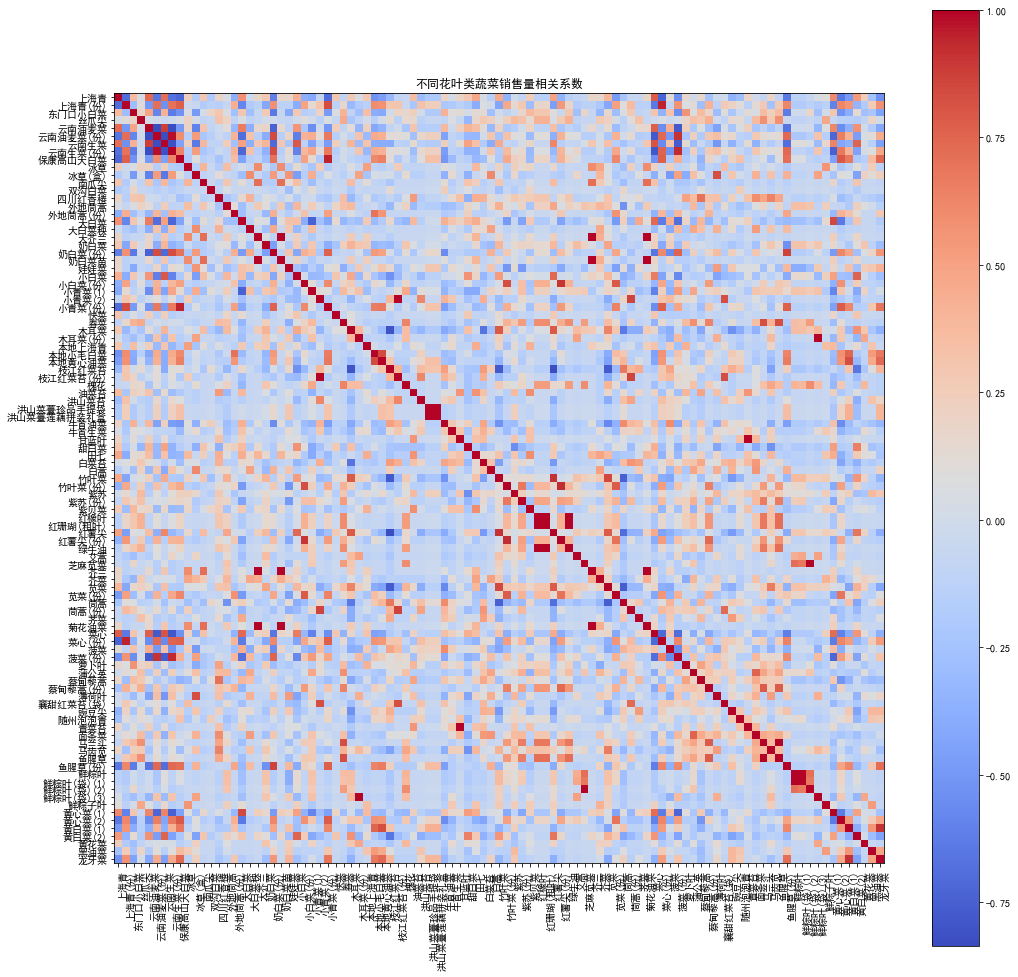

In [28]:
sell_leave_total_top_list = []
sell_leave_total_top_name = []
for i in sell_monthly_df:
    if name2class[i] == "花叶类":
        sell_leave_total_top_list.append(sell_monthly_df[i].values)
        sell_leave_total_top_name.append(i)

relate_leave = np.zeros([len(sell_leave_total_top_name), len(sell_leave_total_top_name)])
for i in range(len(sell_leave_total_top_name)):
    for j in range(len(sell_leave_total_top_name)):
        relate_leave[i, j], p = spearmanr(sell_leave_total_top_list[i], sell_leave_total_top_list[j])

plt.figure(figsize=(15, 15))
plt.xticks(np.arange(len(sell_leave_total_top_name)), labels=sell_leave_total_top_name, 
                     rotation=90, rotation_mode="anchor", ha="right")
plt.yticks(np.arange(len(sell_leave_total_top_name)), labels=sell_leave_total_top_name)
plt.title("不同花叶类蔬菜销售量相关系数")

plt.imshow(relate_leave, cmap='coolwarm', origin='upper')
plt.tight_layout()
plt.colorbar()
plt.show()

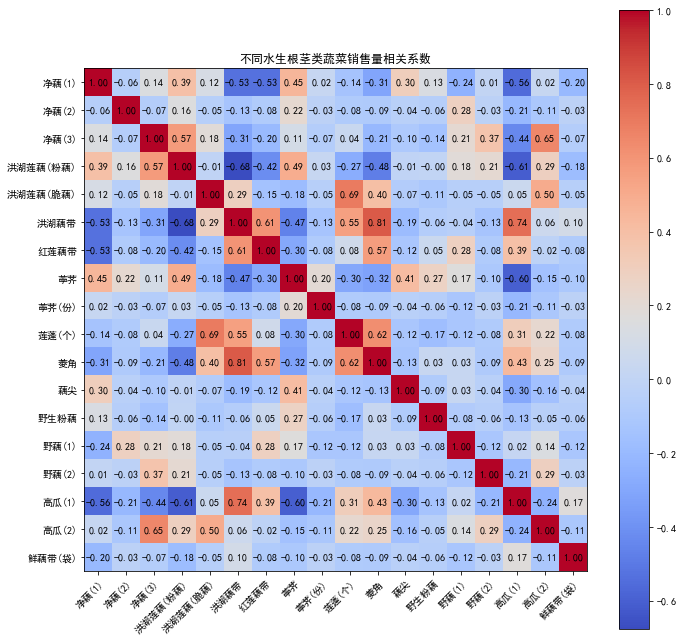

In [29]:
sell_leave_total_top_list = []
sell_leave_total_top_name = []
for i in sell_monthly_df:
    if name2class[i] == "水生根茎类":
        sell_leave_total_top_list.append(sell_monthly_df[i].values)
        sell_leave_total_top_name.append(i)

relate_leave = np.zeros([len(sell_leave_total_top_name), len(sell_leave_total_top_name)])
for i in range(len(sell_leave_total_top_name)):
    for j in range(len(sell_leave_total_top_name)):
        relate_leave[i, j], p = spearmanr(sell_leave_total_top_list[i], sell_leave_total_top_list[j])

plt.figure(figsize=(10, 10))
plt.xticks(np.arange(len(sell_leave_total_top_name)), labels=sell_leave_total_top_name, 
                     rotation=45, rotation_mode="anchor", ha="right")
plt.yticks(np.arange(len(sell_leave_total_top_name)), labels=sell_leave_total_top_name)
plt.title("不同水生根茎类蔬菜销售量相关系数")

for i in range(len(sell_leave_total_top_name)):
    for j in range(len(sell_leave_total_top_name)):
        text = plt.text(j, i, '%.2f'%relate_leave[i, j], ha="center", va="center")

plt.imshow(relate_leave, cmap='coolwarm', origin='upper')
plt.tight_layout()
plt.colorbar()
plt.show()

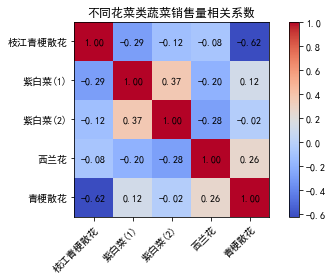

In [30]:
sell_leave_total_top_list = []
sell_leave_total_top_name = []
for i in sell_monthly_df:
    if name2class[i] == "花菜类":
        sell_leave_total_top_list.append(sell_monthly_df[i].values)
        sell_leave_total_top_name.append(i)

relate_leave = np.zeros([len(sell_leave_total_top_name), len(sell_leave_total_top_name)])
for i in range(len(sell_leave_total_top_name)):
    for j in range(len(sell_leave_total_top_name)):
        relate_leave[i, j], p = spearmanr(sell_leave_total_top_list[i], sell_leave_total_top_list[j])

plt.xticks(np.arange(len(sell_leave_total_top_name)), labels=sell_leave_total_top_name, 
                     rotation=45, rotation_mode="anchor", ha="right")
plt.yticks(np.arange(len(sell_leave_total_top_name)), labels=sell_leave_total_top_name)
plt.title("不同花菜类蔬菜销售量相关系数")

for i in range(len(sell_leave_total_top_name)):
    for j in range(len(sell_leave_total_top_name)):
        text = plt.text(j, i, '%.2f'%relate_leave[i, j], ha="center", va="center")

plt.imshow(relate_leave, cmap='coolwarm', origin='upper')
plt.tight_layout()
plt.colorbar()
plt.show()

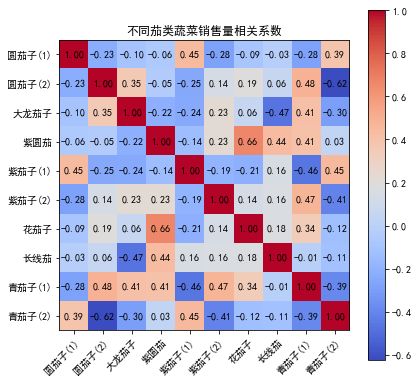

In [31]:
sell_leave_total_top_list = []
sell_leave_total_top_name = []
for i in sell_monthly_df:
    if name2class[i] == "茄类":
        sell_leave_total_top_list.append(sell_monthly_df[i].values)
        sell_leave_total_top_name.append(i)

relate_leave = np.zeros([len(sell_leave_total_top_name), len(sell_leave_total_top_name)])
for i in range(len(sell_leave_total_top_name)):
    for j in range(len(sell_leave_total_top_name)):
        relate_leave[i, j], p = spearmanr(sell_leave_total_top_list[i], sell_leave_total_top_list[j])

plt.figure(figsize=(6, 6))
plt.xticks(np.arange(len(sell_leave_total_top_name)), labels=sell_leave_total_top_name, 
                     rotation=45, rotation_mode="anchor", ha="right")
plt.yticks(np.arange(len(sell_leave_total_top_name)), labels=sell_leave_total_top_name)
plt.title("不同茄类蔬菜销售量相关系数")

for i in range(len(sell_leave_total_top_name)):
    for j in range(len(sell_leave_total_top_name)):
        text = plt.text(j, i, '%.2f'%relate_leave[i, j], ha="center", va="center")

plt.imshow(relate_leave, cmap='coolwarm', origin='upper')
plt.tight_layout()
plt.colorbar()
plt.show()

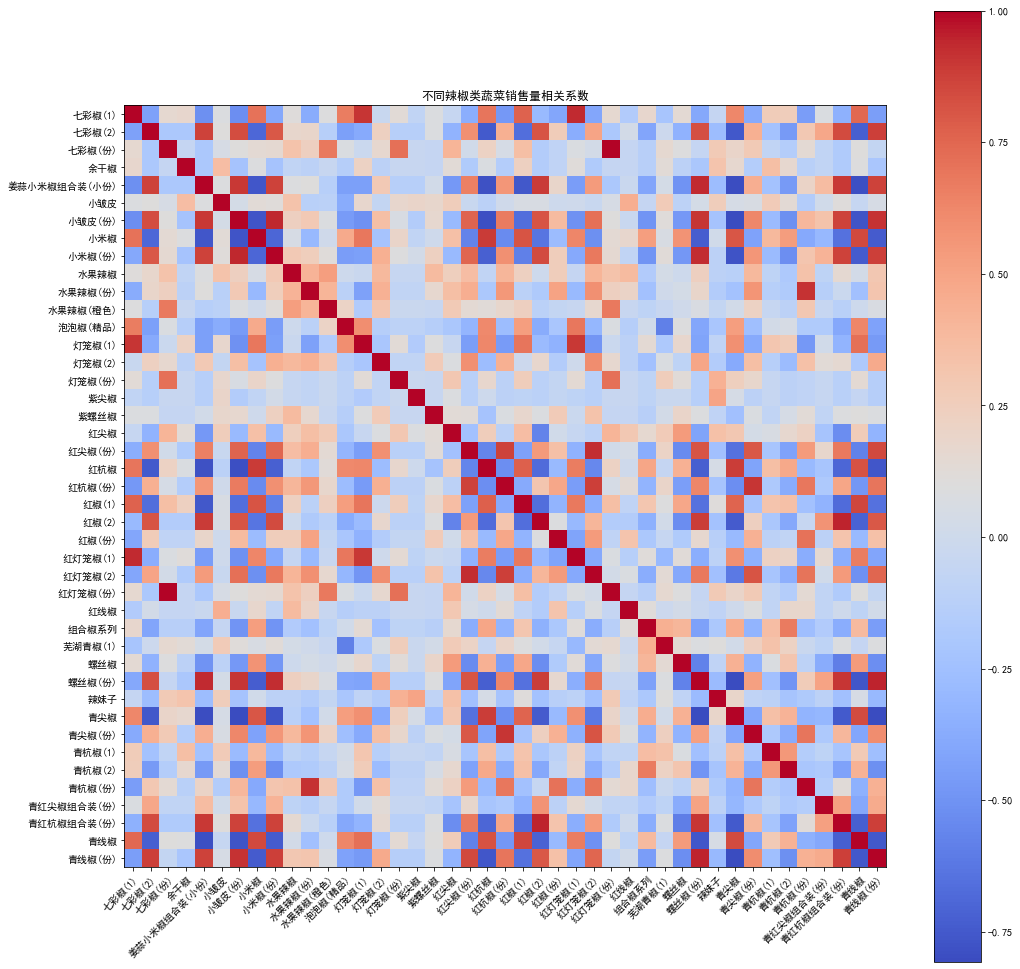

In [32]:
sell_leave_total_top_list = []
sell_leave_total_top_name = []
for i in sell_monthly_df:
    if name2class[i] == "辣椒类":
        sell_leave_total_top_list.append(sell_monthly_df[i].values)
        sell_leave_total_top_name.append(i)

relate_leave = np.zeros([len(sell_leave_total_top_name), len(sell_leave_total_top_name)])
for i in range(len(sell_leave_total_top_name)):
    for j in range(len(sell_leave_total_top_name)):
        relate_leave[i, j], p = spearmanr(sell_leave_total_top_list[i], sell_leave_total_top_list[j])

plt.figure(figsize=(15, 15))
plt.xticks(np.arange(len(sell_leave_total_top_name)), labels=sell_leave_total_top_name, 
                     rotation=45, rotation_mode="anchor", ha="right")
plt.yticks(np.arange(len(sell_leave_total_top_name)), labels=sell_leave_total_top_name)
plt.title("不同辣椒类蔬菜销售量相关系数")

plt.imshow(relate_leave, cmap='coolwarm', origin='upper')
plt.tight_layout()
plt.colorbar()
plt.show()

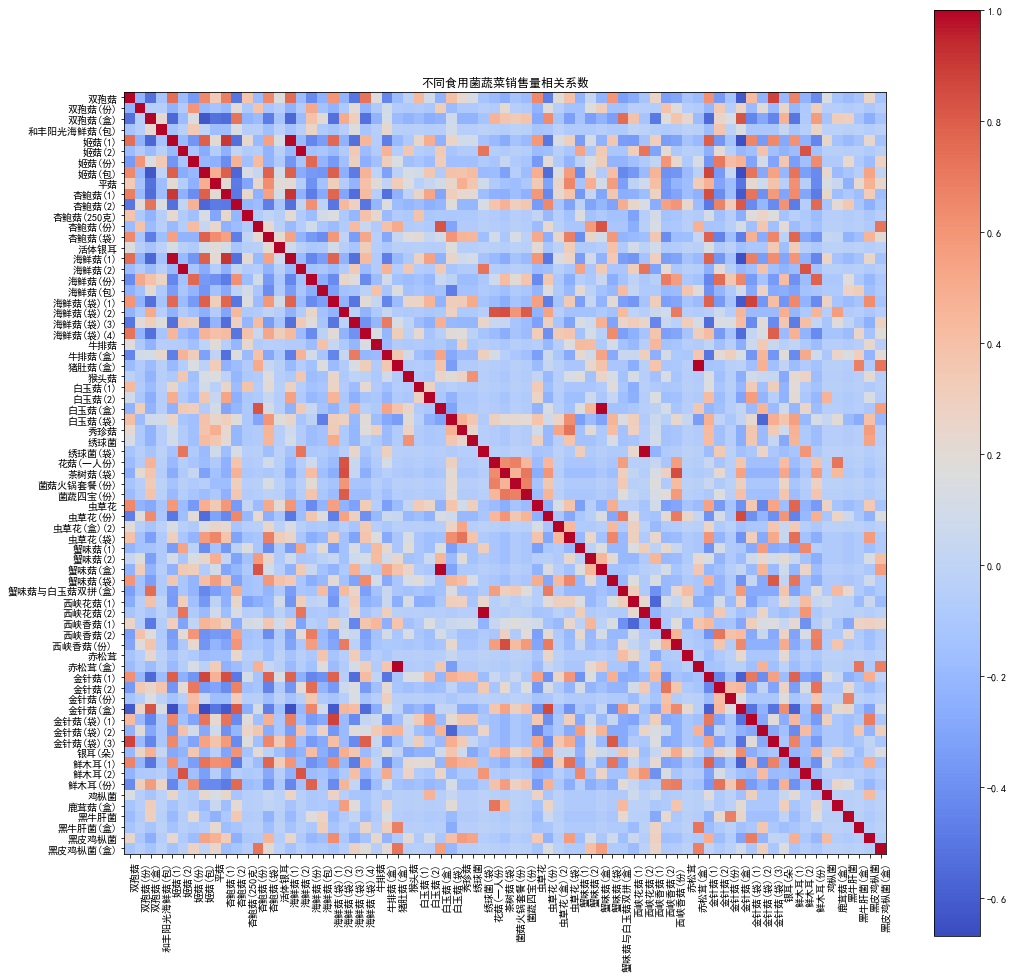

In [33]:
sell_leave_total_top_list = []
sell_leave_total_top_name = []
for i in sell_monthly_df:
    if name2class[i] == "食用菌":
        sell_leave_total_top_list.append(sell_monthly_df[i].values)
        sell_leave_total_top_name.append(i)

relate_leave = np.zeros([len(sell_leave_total_top_name), len(sell_leave_total_top_name)])
for i in range(len(sell_leave_total_top_name)):
    for j in range(len(sell_leave_total_top_name)):
        relate_leave[i, j], p = spearmanr(sell_leave_total_top_list[i], sell_leave_total_top_list[j])

plt.figure(figsize=(15, 15))
plt.xticks(np.arange(len(sell_leave_total_top_name)), labels=sell_leave_total_top_name, 
                     rotation=90, rotation_mode="anchor", ha="right")
plt.yticks(np.arange(len(sell_leave_total_top_name)), labels=sell_leave_total_top_name)
plt.title("不同食用菌蔬菜销售量相关系数")

plt.imshow(relate_leave, cmap='coolwarm', origin='upper')
plt.tight_layout()
plt.colorbar()
plt.show()

# 不同品类相关性

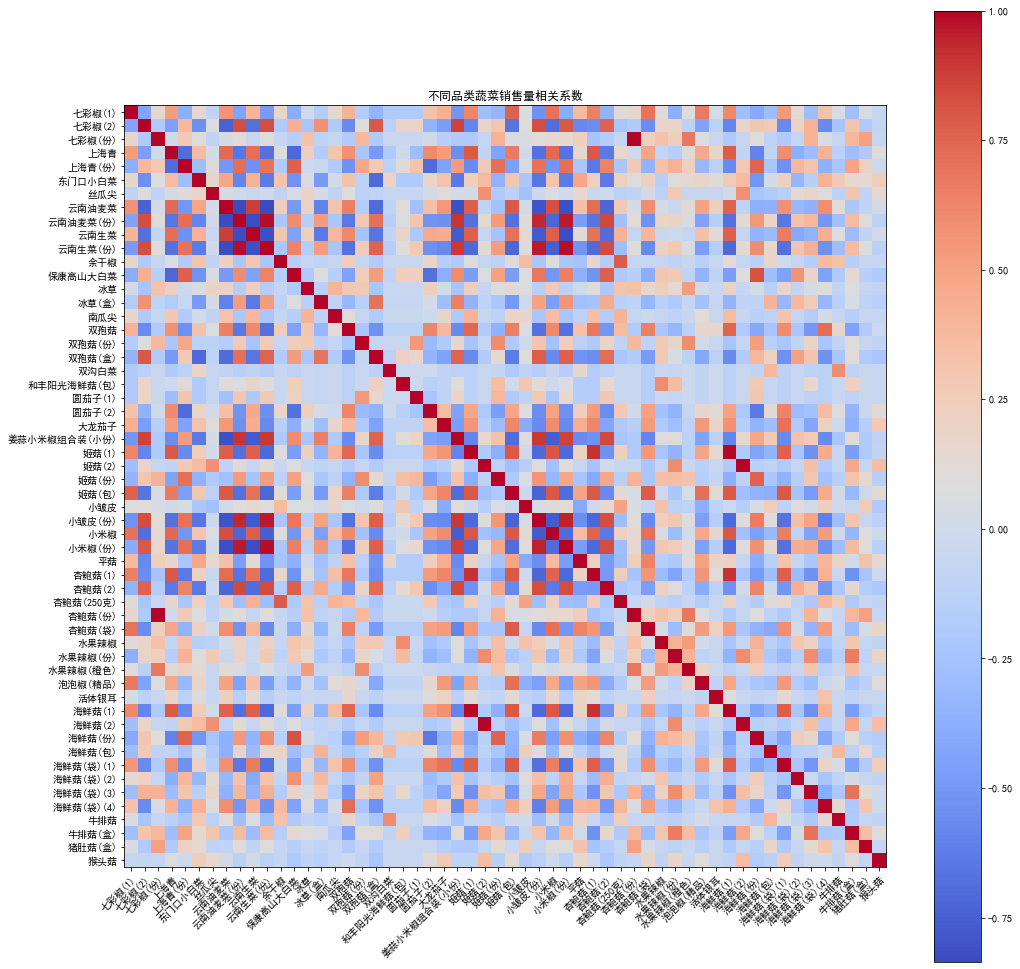

In [34]:
sell_total_top_list = []
sell_total_top_name = []
for i in sell_monthly_df:
    if name2class[i] == '水生根茎类' and len(sell_total_top_name) <=10:
        sell_total_top_list.append(sell_monthly_df[i].values)
        sell_total_top_name.append(i)
        continue
    if name2class[i] == '花叶类' and len(sell_total_top_name) <=20:
        sell_total_top_list.append(sell_monthly_df[i].values)
        sell_total_top_name.append(i)
        continue
    if name2class[i] == '花菜类' and len(sell_total_top_name) <=25:
        sell_total_top_list.append(sell_monthly_df[i].values)
        sell_total_top_name.append(i)
        continue
    if name2class[i] == '茄类' and len(sell_total_top_name) <=35:
        sell_total_top_list.append(sell_monthly_df[i].values)
        sell_total_top_name.append(i)
        continue
    if name2class[i] == '辣椒类' and len(sell_total_top_name) <=45:
        sell_total_top_list.append(sell_monthly_df[i].values)
        sell_total_top_name.append(i)
        continue
    if name2class[i] == '食用菌' and len(sell_total_top_name) <=55:
        sell_total_top_list.append(sell_monthly_df[i].values)
        sell_total_top_name.append(i)

relate_leave = np.zeros([len(sell_total_top_name), len(sell_total_top_name)])
for i in range(len(sell_total_top_name)):
    for j in range(len(sell_total_top_name)):
        relate_leave[i, j], p = spearmanr(sell_total_top_list[i], sell_total_top_list[j])

plt.figure(figsize=(15, 15))
plt.xticks(np.arange(len(sell_total_top_name)), labels=sell_total_top_name, 
                     rotation=45, rotation_mode="anchor", ha="right")
plt.yticks(np.arange(len(sell_total_top_name)), labels=sell_total_top_name)
plt.title("不同品类蔬菜销售量相关系数")

plt.imshow(relate_leave, cmap='coolwarm', origin='upper')
plt.tight_layout()
plt.colorbar()
plt.show()